<a href="https://colab.research.google.com/github/shreyakumar05/Medical_Cost_Prediction/blob/main/medical_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing dataset



In [ ]:
data=pd.read_csv('insurance.csv')
data.sample(5)  #getting 5 samples from the dataset


,age,sex,bmi,children,smoker,region,charges
1281,47,female,27.645,2,yes,northwest,24535.69855
960,19,female,39.615,1,no,northwest,2730.10785
264,53,female,38.060,3,no,southeast,20462.99766
1064,29,female,25.600,4,no,southwest,5708.86700
554,25,female,41.325,0,no,northeast,17878.90068


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Exploratory Data Analysis

male      676
female    662
Name: sex, dtype: int64


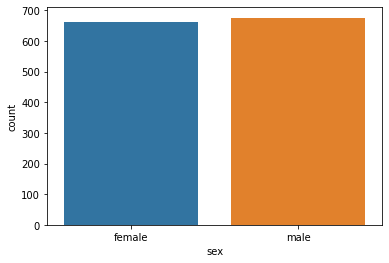

In [ ]:
print(data['sex'].value_counts())
sns.countplot(x='sex',data=data)

no     1064
yes     274
Name: smoker, dtype: int64


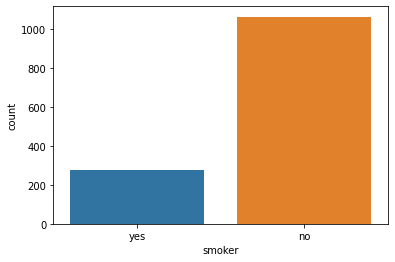

In [ ]:
print(data['smoker'].value_counts())
sns.countplot(x='smoker',data=data)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


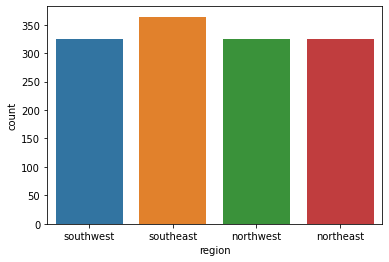

In [ ]:
print(data['region'].value_counts())
sns.countplot(x='region',data=data)

In [ ]:
#label encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


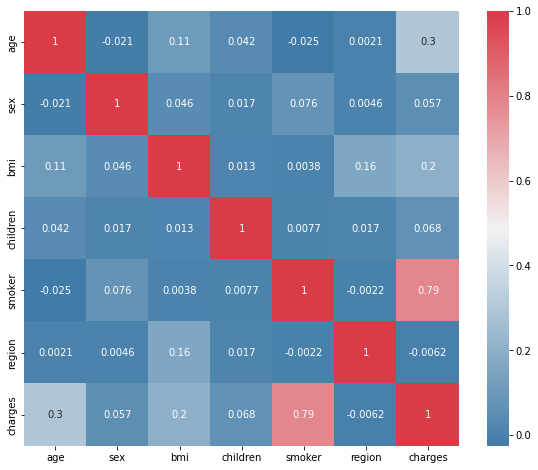

In [ ]:
#checking correlation of the features with our target variable
print(data.corr()['charges'].sort_values())
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True,annot=True, ax=ax)

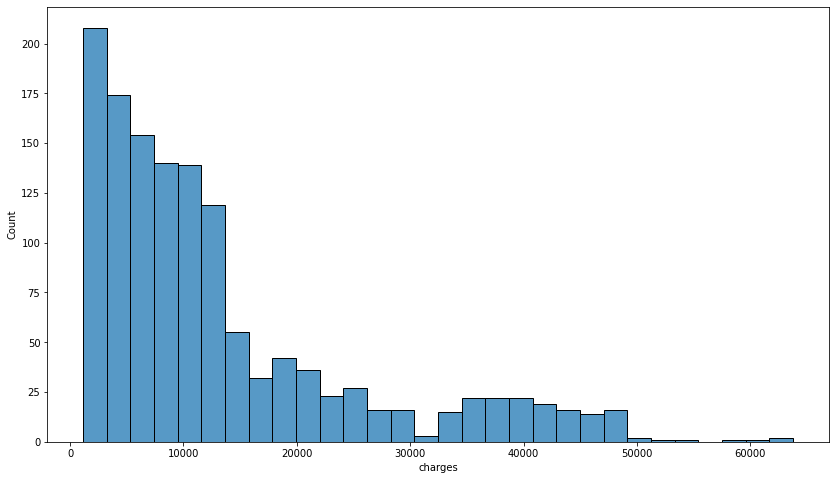

In [ ]:
plt.figure(figsize=(14,8))
sns.histplot(data=data,x='charges')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

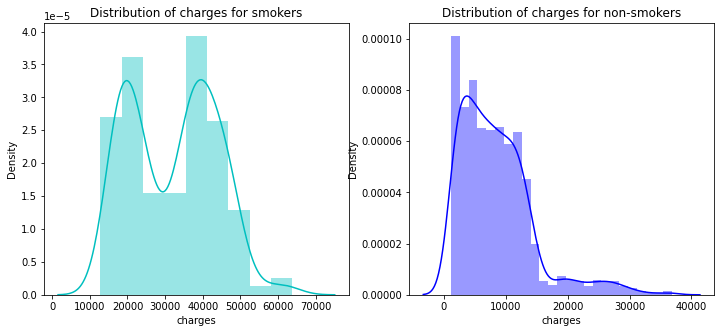

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

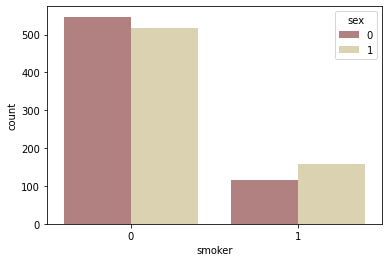

In [ ]:
sns.countplot(x="smoker",hue = 'sex', palette="pink", data=data,)

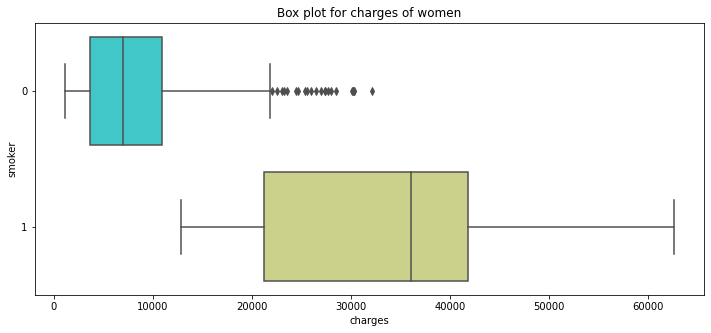

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'rainbow')

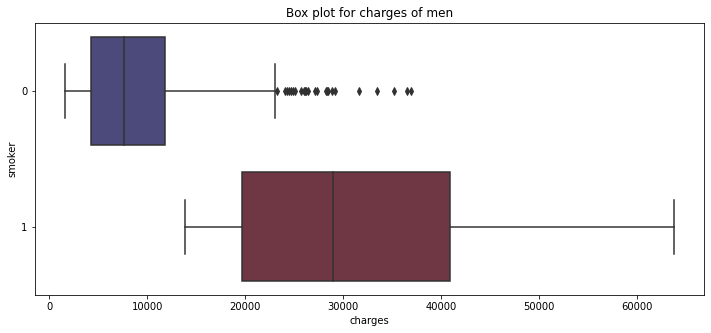

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'icefire')

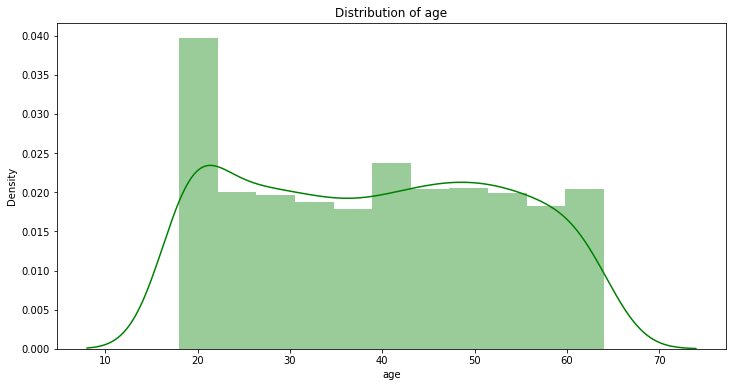

In [ ]:
# let's see how the age affects the cost of patients
plt.figure(figsize=(12,6))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

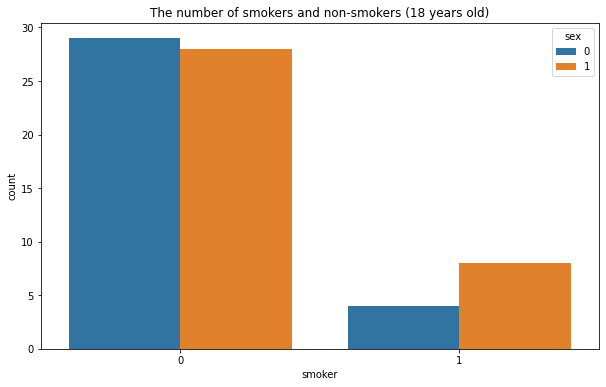

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoker",hue='sex', data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

Text(0.5, 1.0, 'Smokers and non-smokers')

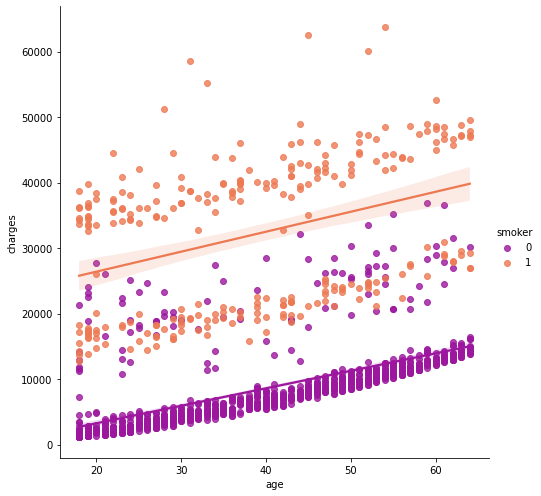

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'plasma', size = 7)
ax.set_title('Smokers and non-smokers')

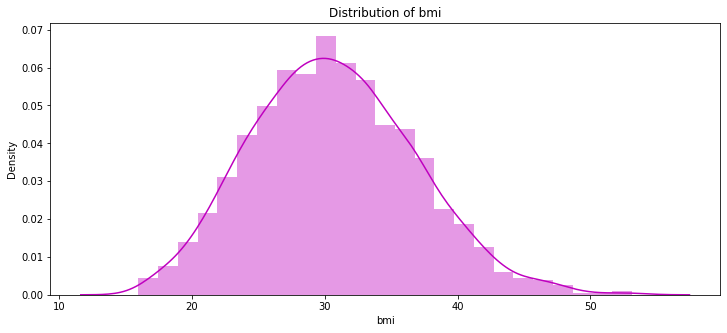

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

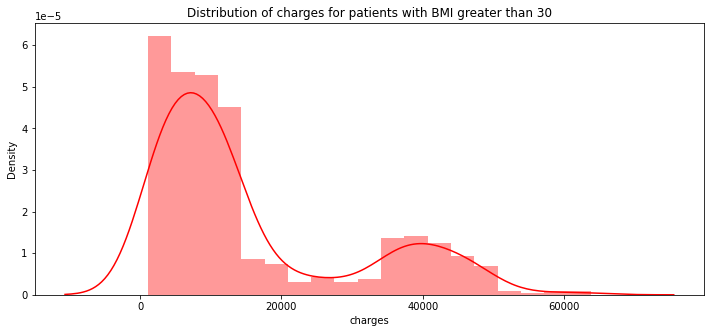

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'r')

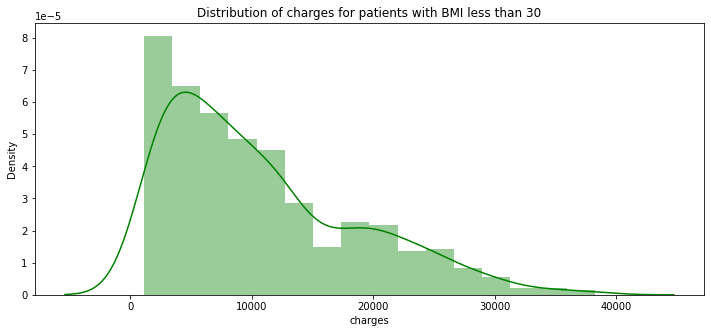

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'g')

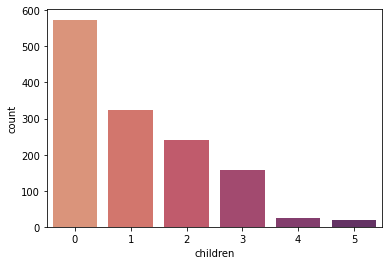

In [ ]:
# let's see the number of children present in our dataset
sns.countplot(x="children", palette="flare", data=data,)

ML Algorithms

In [ ]:
R2_Scores = []
models = ['Linear Regression', 'RandomForest Regression','XGBoost Regressor']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#splitting the data into training and testing
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 42)
# Linear Regression
lin_reg =make_pipeline(StandardScaler(),LinearRegression())
lin_reg.fit(X_train , y_train)
accuracies = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 10)
y_pred = lin_reg.predict(X_test)
print('')
print('     Linear Regression      ')
print('Score : %.4f' % lin_reg.score(X_test, y_test))
print( accuracies)
print('Mean score: %0.3f'% accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Linear Regression      
Score : 0.7669
[0.76057975 0.74872437 0.851063   0.74054515 0.73217062 0.67252427
 0.59195142 0.69646742 0.76155267 0.77433943]
Mean score: 0.733

MSE    : 35174149.33 
RMSE   : 5930.78 
R2     : 0.77 


In [ ]:
# Random Forrest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10)
y_pred = clf_rf.predict(X_test)
print('')
print('     Random Forest     ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Random Forest     
Score : 0.8507
[0.84932378 0.83984535 0.91959385 0.84713944 0.75698451 0.84934722
 0.72724832 0.76571396 0.82012982 0.84543381]
Mean: 0.822

MSE    : 22528217.96 
RMSE   : 4746.39 
R2     : 0.85 


In [ ]:
# XGBoost
clf_xgb = XGBRegressor()
clf_xgb.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_xgb, X = X_train, y = y_train, cv = 10)
y_pred = clf_xgb.predict(X_test)
print('')
print('     XGBoost     ')
print('Score : %.4f' % clf_xgb.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
2,XGBoost Regressor,0.863158
1,RandomForest Regression,0.850699
0,Linear Regression,0.766891


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2','sqrt'],
               'n_estimators': [10,25,50,100]}

g_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
#finding the best parameters for our model
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
# Random Forrest
clf_rf = RandomForestRegressor(bootstrap=True,max_depth=5,max_features=6,n_estimators=50)
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10)
y_pred = clf_rf.predict(X_test)
print('')
print('     Random Forest     ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Random Forest     
Score : 0.8611
[0.8864476  0.84605148 0.94372518 0.8760638  0.78835177 0.86549898
 0.73720977 0.81334904 0.83858658 0.85875027]
Mean: 0.845

MSE    : 20961876.96 
RMSE   : 4578.41 
R2     : 0.86 
